In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from imutils import paths
import numpy as np
import imutils
import cv2
import os
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [20]:
rawImages = []
labels = []
DATADIR = 'C:/Users/USER/Desktop/Test_set_for sarai/Preprocess/'
IMG_SIZE = 512

# เป็น function ที่บอกว่า file เรามี normal,abnormal กี่รูป 
def create_array_data():
    #1 = Normal , 0 = Abnormal
    CATEGORIES = ["Abnormal", "Normal"] # มาจาก file เราที่แยกให้แล้วด้วยมือ แต่ถ้าของจริงรูปมันเยอะเราเลยแยกด้วยตาเป็น 2file ไม่ไหว เลยต้องใช้วิธีอื่น
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) # จาก CATEGORIES ระบุว่าให้แสดง "Normal" เป็น 1, "Abnormal" เป็น0
        for img in os.listdir(path):      
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            rawImages.append(new_array)
            labels.append(class_num)
            
create_array_data()

In [21]:
def image_to_feature_vector(image, size=(256, 256)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [22]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    #clr = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    # handle normalizing the histogram if we are using OpenCV 2.4.X
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
        # otherwise, perform "in place" normalization in OpenCV 3 (I
        # personally hate the way this is done
    else:
        cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [23]:
features = []
rawImage =[]
for o in rawImages:
    hist = extract_color_histogram(o)
    features.append(hist)

In [24]:
scaler = StandardScaler()
scaler.fit(features)
scaled_data = scaler.transform(features)

In [7]:
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(scaled_data, labels)

In [33]:
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_data,labels)
    pred_i = knn.predict(scaled_data8)
    error_rate.append(np.mean(pred_i != labels1))

Text(0, 0.5, 'Error Rate')

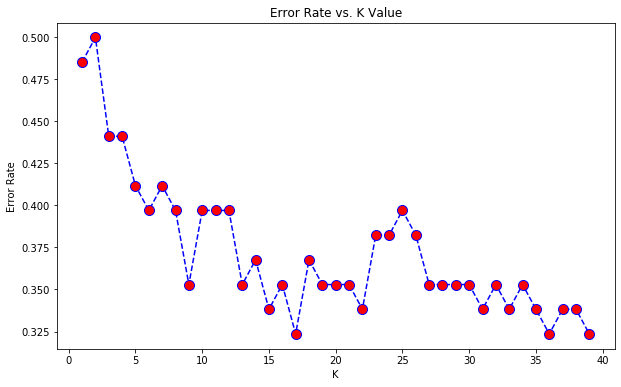

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(scaled_data,labels)
pred = knn.predict(scaled_data8)

print('WITH K=2')
print('\n')
print(confusion_matrix( labels1,pred))
print('\n')
print(classification_report( labels1,pred))

WITH K=2


[[28  6]
 [16 18]]


              precision    recall  f1-score   support

           0       0.64      0.82      0.72        34
           1       0.75      0.53      0.62        34

    accuracy                           0.68        68
   macro avg       0.69      0.68      0.67        68
weighted avg       0.69      0.68      0.67        68



In [39]:
import pickle 
knnPickle = open('knnpickle_file2', 'wb') 
# source, destination 
pickle.dump(knn, knnPickle)                      
# load the model from disk
loaded_model = pickle.load(open('knnpickle_file2', 'rb'))